In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-datasets/artists.csv
/kaggle/input/spotify-datasets/tracks.csv
/kaggle/input/ultimate-spotify-tracks-db/SpotifyFeatures.csv


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

In [3]:
df_traks = pd.read_csv('../input/spotify-datasets/tracks.csv')
df_traks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
df_traks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [5]:
df_traks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
sorted_df = df_traks.sort_values('popularity' , ascending = True).head(10)
sorted_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4
546218,0qrKnQtYDVJhKFAXTHYVS9,ゆうべはどうしたの (WHATSA MALLA U),0,183427,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.631,0.249,5,-11.883,1,0.0355,0.951,0.000000,0.0814,0.517,131.097,4
546217,0nqsDxOeKSwEzp3AUQAAqS,"Screen Director's Playhouse, Music For Million...",0,1767071,0,"['Wilms Herbert', 'June Allyson', 'Joseph Kear...","['2rbm8QWvmnVwxFo84EVM1h', '4yW5adMgyIfHFzaL9i...",1949-04-10,0.533,0.317,7,-13.047,1,0.9180,0.682,0.000000,0.3330,0.336,76.836,4
546216,0kGEdsxVLYjCdfxM9tbezd,ブルーマンボ,0,162147,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.529,0.546,0,-6.462,0,0.0418,0.784,0.000000,0.3750,0.903,128.604,4
546215,0bc3PUZurUUXrY7yqoOxjq,"Screen Director's Playhouse, Trade Winds direc...",0,1776652,0,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'...","['7hkhJTTI3VnUGVWUt8SJXT', '3kYeeIpRCgJz4fQYDv...",1949-05-19,0.599,0.321,0,-15.428,0,0.9330,0.808,0.000000,0.5570,0.379,93.025,4
546214,0Wwm0ruSjYMIiWG0nyAI1F,"Screen Director's Playhouse, It's A Wonderful ...",0,1767576,0,"['Joseph Granby', 'Jimmy Stewart', 'Irene Tedr...","['6GK59BC4LJzqR0OpHAX2S3', '58BzBaExrnrx898sby...",1949-05-08,0.645,0.341,8,-12.177,1,0.8670,0.690,0.000000,0.1530,0.431,117.591,4


In [7]:
df_traks.loc[df_traks['popularity'] > 90 , ['name' ,'popularity', 'danceability', 'energy']].sort_values('energy', ascending = False).head(10)

#equivelant to 
#df_traks.query('popularity > 90' , inplace = False ).sort_values('popularity', ascending = False)

,name,popularity,danceability,energy
93812,Wellerman - Sea Shanty / 220 KID x Billen Ted ...,92,0.722,0.893
92839,Head & Heart (feat. MNEK),91,0.734,0.874
93807,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,0.824,0.862
92810,Save Your Tears,97,0.680,0.826
91867,Watermelon Sugar,92,0.548,0.816
92826,positions,92,0.737,0.802
93809,Up,92,0.868,0.795
93814,Your Love (9PM),91,0.669,0.784
92830,Dynamite,91,0.746,0.765
92827,Hecha Pa' Mi,92,0.725,0.756


In [8]:
df_traks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [9]:
df_traks.set_index('release_date' , inplace = True)
df_traks.index = pd.to_datetime(df_traks.index)
df_traks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [10]:
df_traks['duration'] = df_traks['duration_ms'].map(lambda x : round(x/1000))
df_traks.drop('duration_ms' , axis = 1)
df_traks['duration'].head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration_ms'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature'),
 Text(12.5, 0, 'duration')]

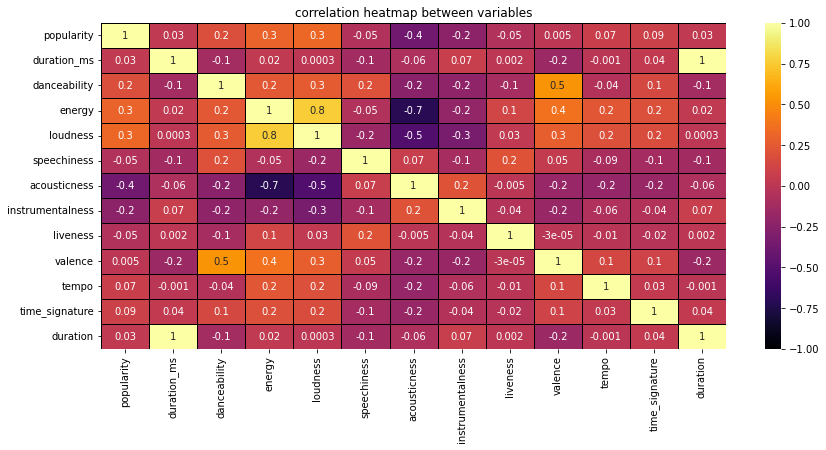

In [11]:
corr_df = df_traks.drop(['key' , 'mode' ,'explicit'] ,axis = 1).corr(method = 'pearson')
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df ,annot  =True , vmin = -1 ,vmax = 1 , cmap = 'inferno' , linewidth = 1 ,linecolor = 'black' , center = 0 ,fmt  = '.1g')
heatmap.set_title('correlation heatmap between variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

In [12]:
sample_df = df_traks.sample(int(0.004*len(df_traks)))
len(sample_df)

2346

[Text(0.5, 1.0, 'loudness vs energy correlation')]

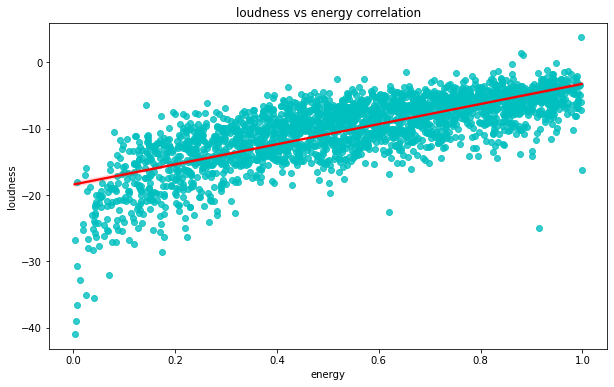

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df , x = 'energy' , y = 'loudness', scatter_kws = {'color':'c'} , line_kws = {'color':'red'} ).set(title = 'loudness vs energy correlation')

[Text(0.5, 1.0, 'loudness vs danceability correlation')]

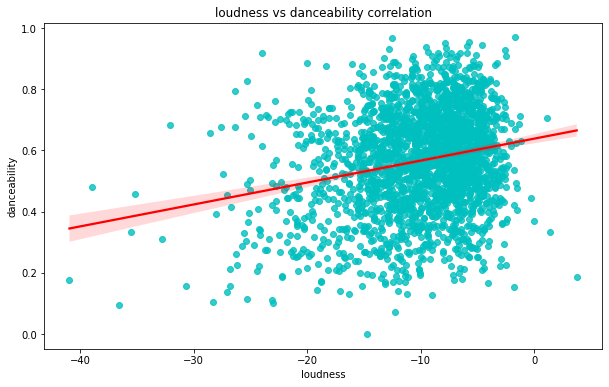

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df , x = 'loudness' , y = 'danceability', scatter_kws = {'color':'c'} , line_kws = {'color':'red'} ).set(title = 'loudness vs danceability correlation')

[Text(0.5, 1.0, 'loudness vs danceability correlation')]

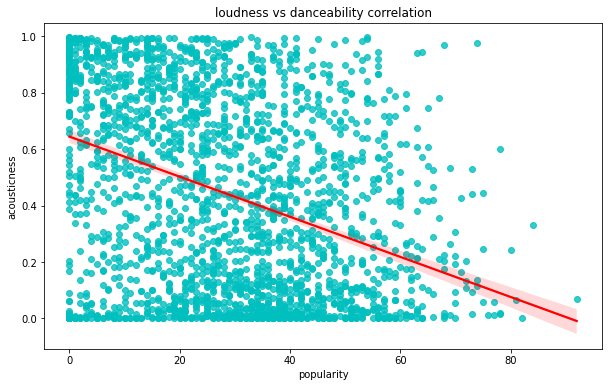

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df , x = 'popularity' , y = 'acousticness', scatter_kws = {'color':'c'} , line_kws = {'color':'red'} ).set(title = 'loudness vs danceability correlation')

In [16]:
df_traks['date'] = df_traks.index.get_level_values('release_date')
df_traks.date = pd.to_datetime(df_traks.date)
years = df_traks.date.dt.year

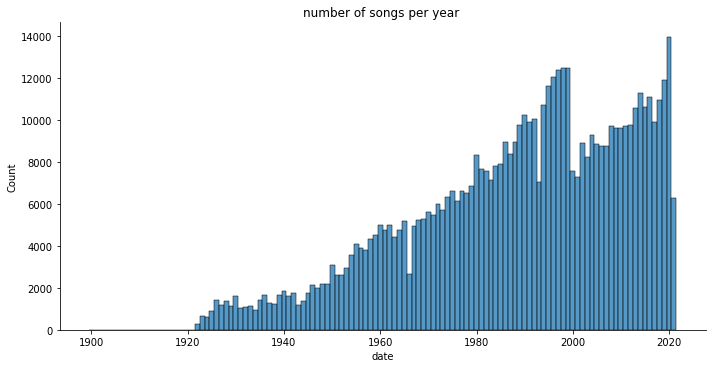

In [17]:
sns.displot(years  , kind = 'hist' ,discrete = True , aspect = 2 , height = 5).set(title = 'number of songs per year ')

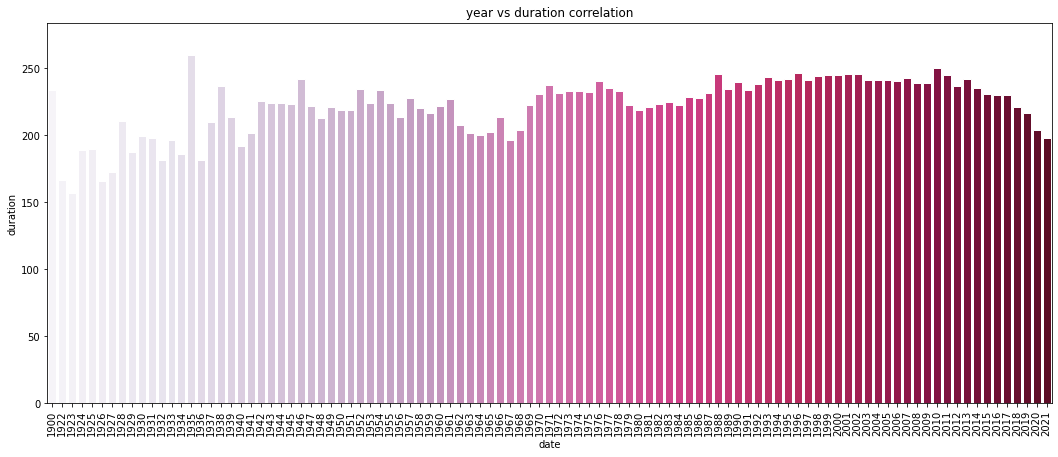

In [18]:
total_dr = df_traks.duration
fig,ax = plt.subplots(figsize= (18,7))
fig = sns.set_style('dark')
fig = sns.barplot(x = years , y = total_dr , ax =ax , errwidth = False ,palette = 'PuRd').set(title = 'year vs duration correlation')
plt.xticks(rotation = 90)
plt.show()

In [19]:
# total_dr = df_traks.duration
# plt.figure(figsize= (10,5))
# sns.set_style('whitegrid')
# sns.lineplot(x = years , y = total_dr ,ax=ax).set(title = 'years vs duraion')
# plt.xticks(rotation = 90)


In [20]:
df_genre = pd.read_csv('../input/ultimate-spotify-tracks-db/SpotifyFeatures.csv')

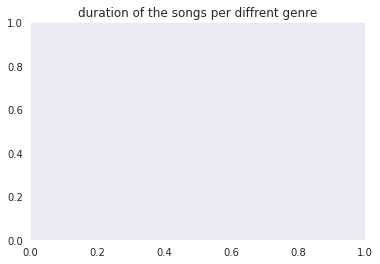

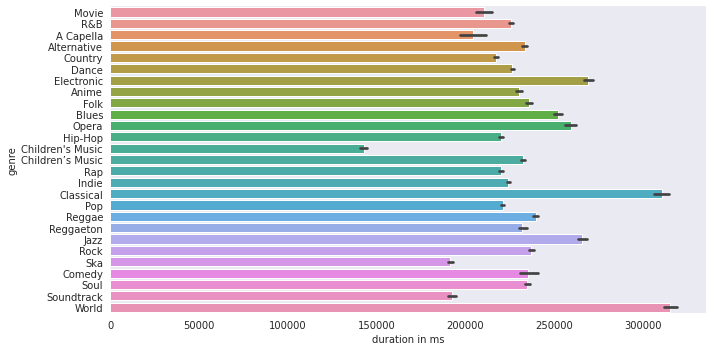

In [21]:
plt.title('duration of the songs per diffrent genre')
sns.color_palette('rocket' ,as_cmap =True)
sns.catplot(y = 'genre' , x= 'duration_ms' , data =df_genre,kind ='bar',aspect = 2 )
plt.xlabel('duration in ms')
plt.ylabel('genre')
plt.show()

<Figure size 720x360 with 0 Axes>

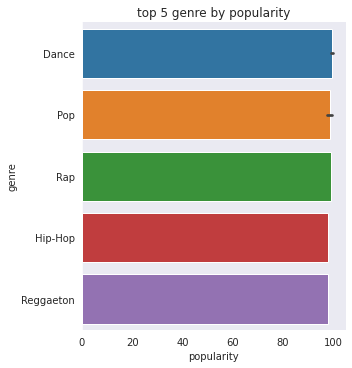

In [22]:
plt.figure(figsize = (10,5))
famous = df_genre.sort_values('popularity' , ascending = False).head(10)
sns.catplot(x = 'popularity' , y = 'genre' , kind = 'bar' , data = famous).set(title = 'top 5 genre by popularity')
plt.show()